In [1]:
# All of the imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
np.random.seed(2)

# Bayesian model selection

Bayesian model selection is an analytical tool that we can use to compare models with different numbers of parameters, while integrating our physical understanding of the models to influence the analysis. 
For example, consider the following hypothetical *x,y*-data shown below (note that in addition to the data being manufactured so are the models dicussed below, but bare with me).

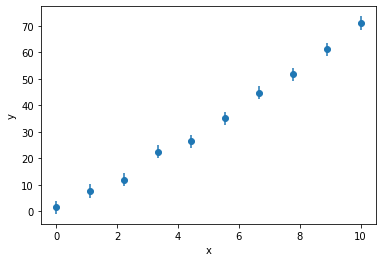

In [2]:
x = np.linspace(0, 10, 10)
y = 0.2 * x ** 2 + 5 * x + 2 + np.random.randn(10)
dy = np.ones_like(y) * 2.5
plt.errorbar(x, y, dy, marker='o', ls='')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()

The experiment that gave rise to this data can be explained by either a linear or quadratic model:
1. $y = m x + c $ 
2. $y = ax^2 + bx + c$

In the literature, the model 2 is twice as common (due to model 1 being quantum mechanically forbidden). 
Let's find the likelihood for each of the models, as [discussed previously](./likelihood). 

In [9]:
def model1(x, m, c):
    return m * x + c

def model2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt1, pcov1 = optimize.curve_fit(model1, x, y)
popt2, pcov2 = optimize.curve_fit(model2, x, y)

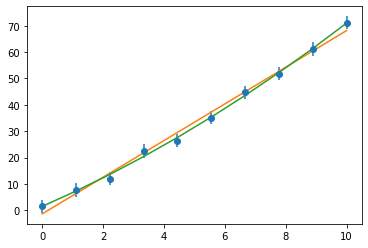

In [10]:
plt.errorbar(x, y, dy, marker='o', ls='')
plt.plot(x, model1(x, *popt1))
plt.plot(x, model2(x, *popt2))

In [11]:
def likelihood(x, y, dy, model, popt):
    return np.exp(-0.5 * np.sum(np.square((y - model(x, *popt)) / dy) + np.log(2 * np.pi * dy ** 2)))

In [12]:
l1 = likelihood(x, y, dy, model1, popt1)
l2 = likelihood(x, y, dy, model2, popt2)

In [13]:
print('L(model1) = {:.2e}'.format(l1))
print('L(model2) = {:.2e}'.format(l2))

L(model1) = 4.23e-10
L(model2) = 4.52e-09


Above, we can see that the more complex and less common model is more likely given the experimental data. 
Hopefully, we recognise that the model with more parameters is better suited to agree with the experimental data {cite}`mayer_drawing_2010`.

In [8]:
y

array([ 1.58324215,  7.74620231, 11.96256934, 22.5291597 , 26.37940392,
       35.10886992, 44.72510364, 51.74236623, 61.18896136, 71.09099239])